In [1]:
# General purpose
import os
import sys
# Data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
# Machine learning
import sklearn
# Jupyter notebook
%config InlineBackend.figure_format = 'retina'

## 1. Data Wrangling
### 1.1 Get the data

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### 1.2 Clean data
#### 1.2.1 Survived
This feature describes the survival of a particular passenger. Categorical variable: [0,1] 

In [4]:
dataframe_survived = df["Survived"]
dataframe_survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Looking for outliers: 0

Class balance, Survived: 342 Not survived: 549


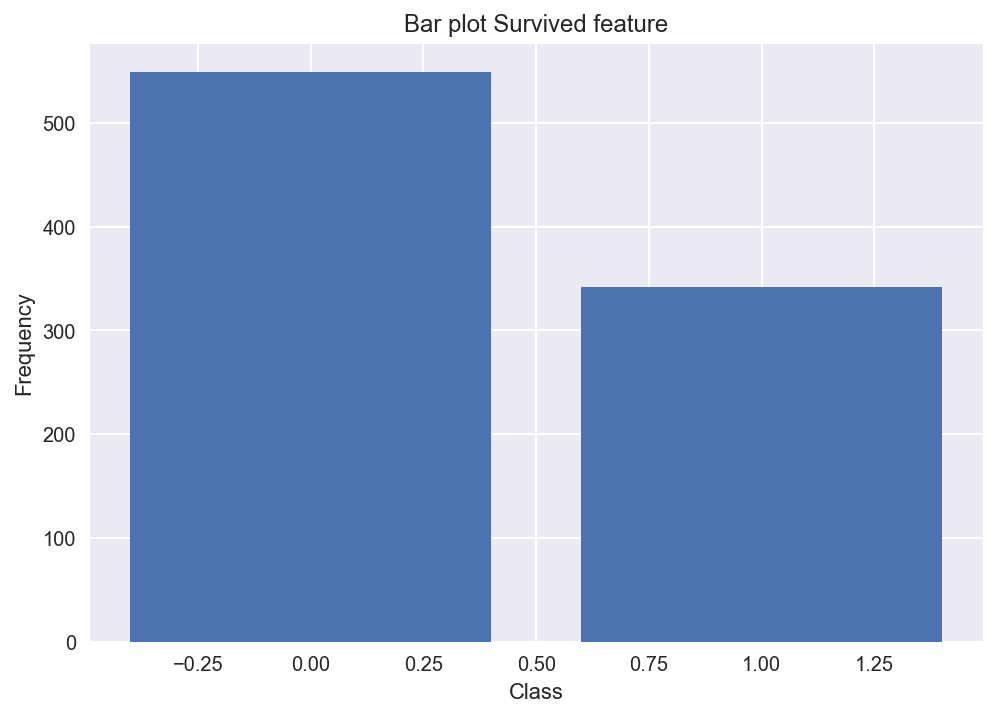

In [5]:
print("Looking for outliers: {}".format(dataframe_survived.isnull().sum()))
print("\nClass balance, Survived: {} Not survived: {}".format(df.query("Survived == 1").shape[0], \
                                                              df.query("Survived == 0").shape[0]))
plt.bar([0, 1], [df.query("Survived == 0").shape[0], df.query("Survived == 1").shape[0]])
plt.title("Bar plot Survived feature")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

##### Survived results
The output class does not have any outliers, the class distribution is a bit skewed towards the not survived class. 

#### 1.2.2 Pclass
Also categorical variable: [1,2,3]

In [6]:
pclass = df["Pclass"]
pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [7]:
print("Looking for outliers: {}".format(pclass.isnull().sum()))

Looking for outliers: 0


In [8]:
pclass1_survived = df.query("Pclass == 1 & Survived == 1").shape[0]
pclass2_survived = df.query("Pclass == 2 & Survived == 1").shape[0]
pclass3_survived = df.query("Pclass == 3 & Survived == 1").shape[0]

pclass1_not_survived = df.query("Pclass == 1 & Survived == 0").shape[0]
pclass2_not_survived = df.query("Pclass == 2 & Survived == 0").shape[0]
pclass3_not_survived = df.query("Pclass == 3 & Survived == 0").shape[0]

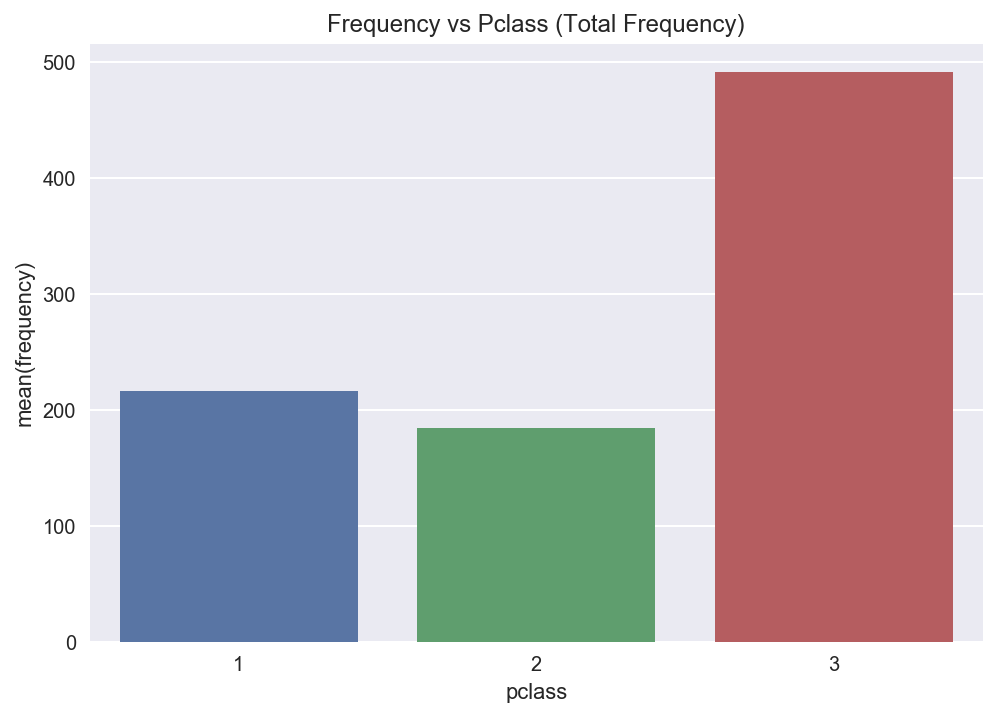

In [9]:
df_bar_plot_pclass_0 = pd.DataFrame({"pclass": [1, 2, 3], "frequency": [pclass1_survived+pclass1_not_survived, pclass2_survived+pclass2_not_survived,\
                                                                       pclass3_survived+pclass3_not_survived]})

ax = sns.barplot(x = "pclass", y = "frequency", data = df_bar_plot_pclass_0)
plt.title("Frequency vs Pclass (Total Frequency)")
plt.show()

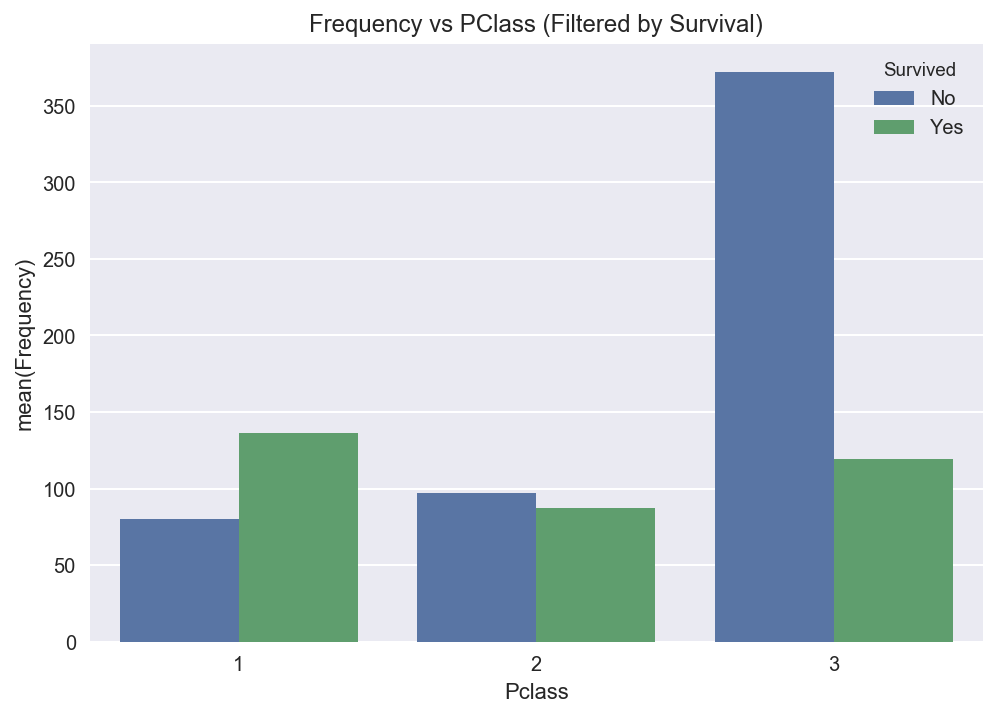

In [10]:
#df_bar_plot_pclass = df.drop([each for each in df.columns if not each == "Pclass" or each == "Survived"], axis = 1)
df_bar_plot_pclass = pd.DataFrame({"Survived": ["No", "No", "No", "Yes", "Yes", "Yes"], "Pclass": [1, 2, 3, 1, 2, 3],\
                                   "Frequency": [pclass1_not_survived, pclass2_not_survived, pclass3_not_survived,\
                                                pclass1_survived, pclass2_survived, pclass3_survived]})

ax = sns.barplot(x = "Pclass", y = "Frequency", hue = "Survived", data = df_bar_plot_pclass)
plt.title("Frequency vs PClass (Filtered by Survival)")
plt.show()

##### Pclass results
Pclass distribution is composed mostly of third class passengers. Not enough data for second and first class. With respect to the distribution using **Survival**, first and second class have same frequencies. Third class is skewed towards people that did not survive. 

#### Sex
Categorical variable. [male, female]

In [11]:
print("Looking for outliers: {}".format(df["Sex"].isnull().sum().sum()))

Looking for outliers: 0


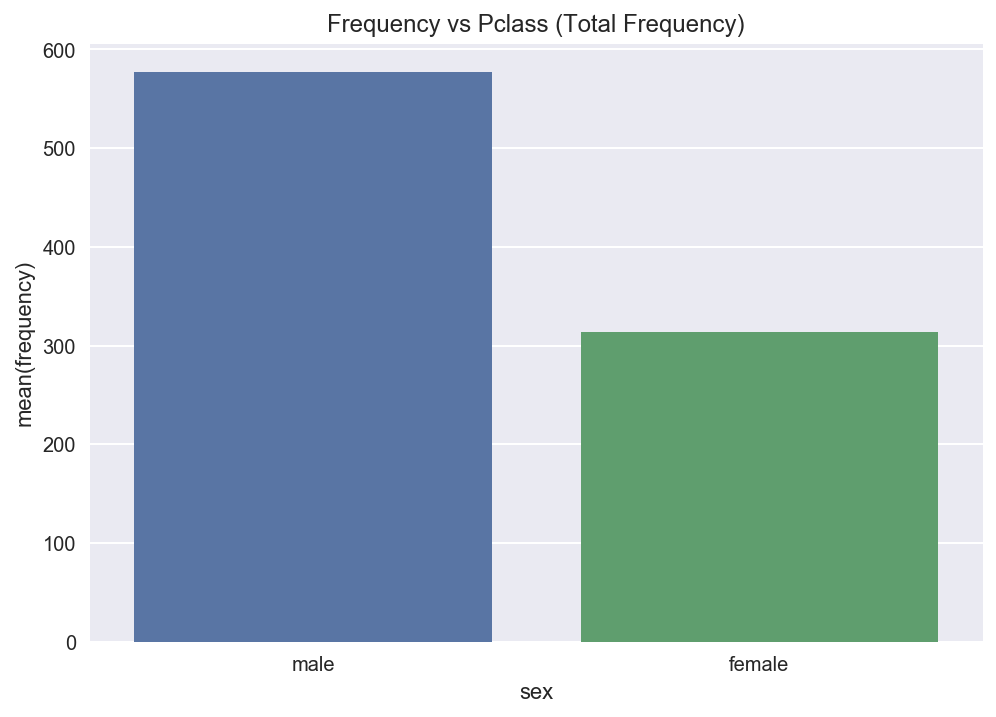

In [12]:
male_survived = df.query("Sex == 'male' & Survived == 1").shape[0]
male_not_survived = df.query("Sex == 'male' & Survived == 0").shape[0]

female_survived = df.query("Sex == 'female' & Survived == 1").shape[0]
female_not_survived = df.query("Sex == 'female' & Survived == 0").shape[0]

df_bar_plot_sex = pd.DataFrame({"sex": ["male", "female"], "frequency": [male_survived+male_not_survived,\
                                                                           female_survived+female_not_survived]})
ax = sns.barplot(x = "sex", y = "frequency", data = df_bar_plot_sex)
plt.title("Frequency vs Pclass (Total Frequency)")
plt.show()

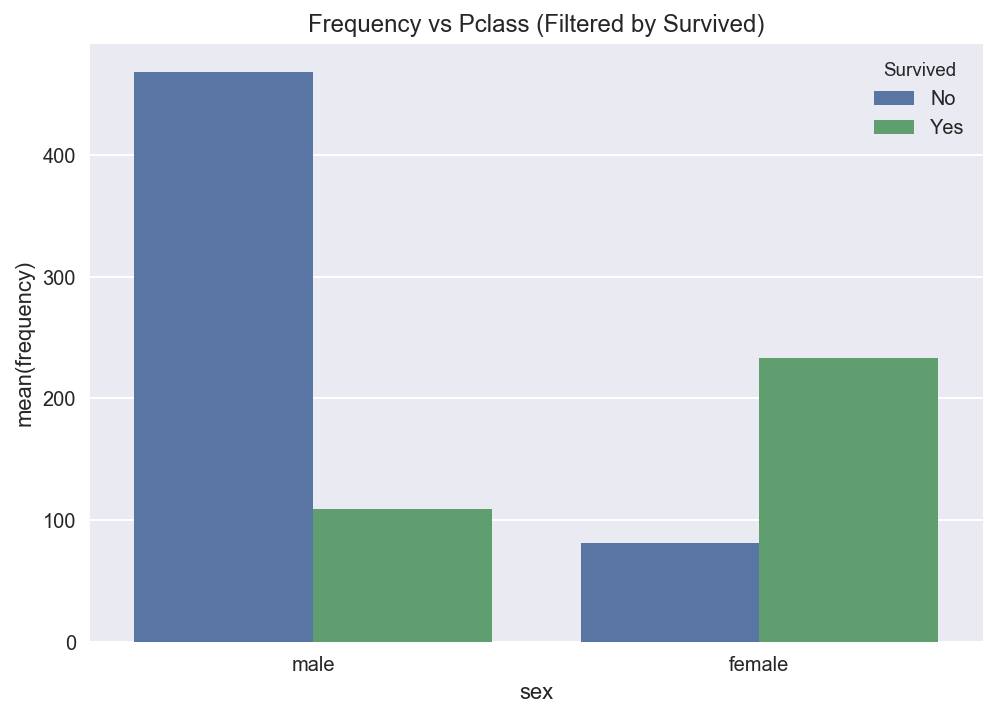

In [13]:
df_bar_plot_sex_ = pd.DataFrame({"sex": ["male", "male", "female", "female"], "Survived": ["No", "Yes", "No", "Yes"],\
                                 "frequency": [male_not_survived, male_survived,\
                                            female_not_survived, female_survived]})
ax = sns.barplot(x = "sex", y = "frequency", hue = "Survived", data = df_bar_plot_sex_)
plt.title("Frequency vs Pclass (Filtered by Survived)")
plt.show()

#### Age
Continuous variable that defines the age of each passanger. Range: [0.42, 80]

In [14]:
print("Looking outliers: {}".format(df["Age"].isnull().sum().sum()))

Looking outliers: 177


In [15]:
# Clean outliers
mean_age_train = df["Age"].mean()
df["Age"] = df["Age"].fillna(mean_age_train)

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


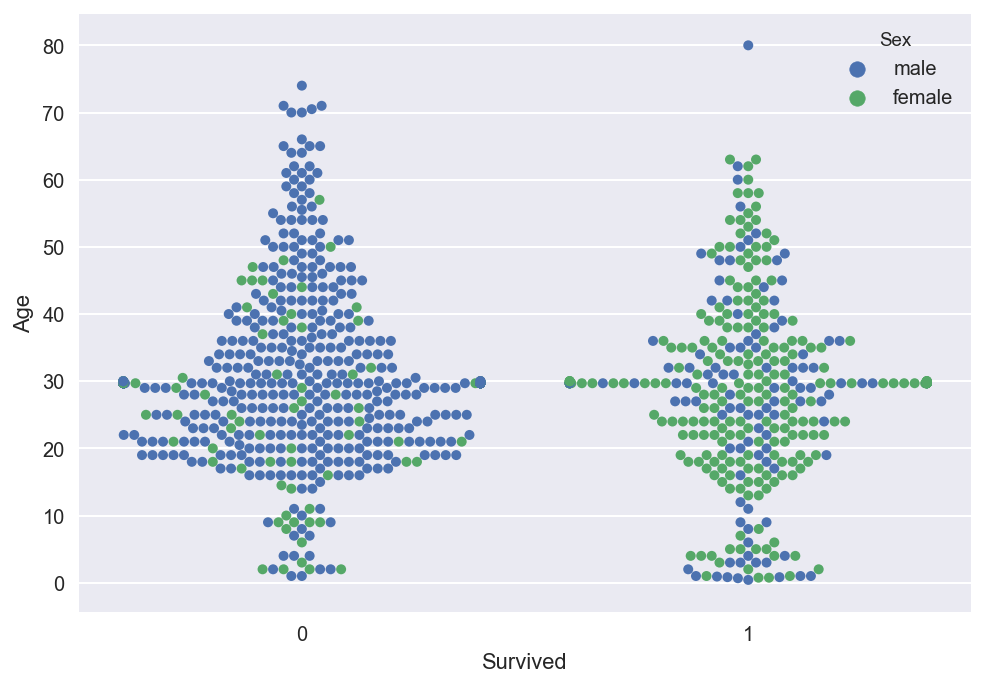

In [17]:
ax = sns.swarmplot(x="Survived", y="Age", hue="Sex", data=df)
plt.show()

#### SibSp

In [18]:
print("Looking for outliers: {}".format(df["SibSp"].isnull().sum().sum()))

Looking for outliers: 0


In [19]:
# We don't understand this variable very well, so ...
print("Unique values of SibSp(categorical variable): ", df["SibSp"].unique())
df.describe()

Unique values of SibSp(categorical variable):  [1 0 3 4 2 5 8]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


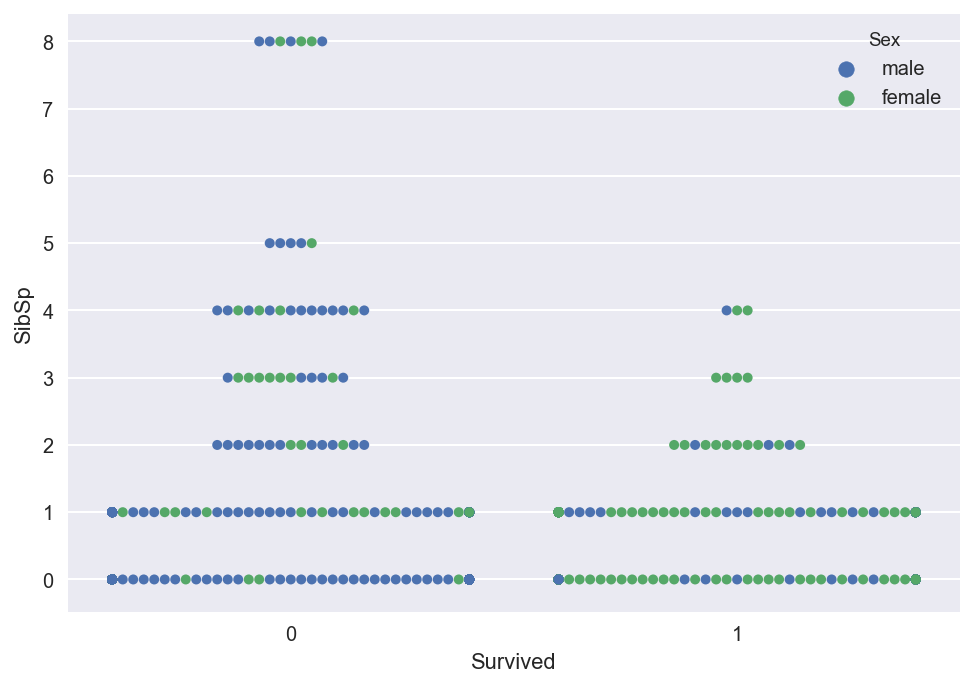

In [20]:
ax = sns.swarmplot(x="Survived", y="SibSp", hue="Sex", data=df)
plt.show()

#### Parch

In [21]:
print("Looking for outliers: {}".format(df["Parch"].isnull().sum().sum()))

Looking for outliers: 0


In [22]:
# We don't understand this variable very well, so ...
print("Unique values of SibSp(categorical variable): ", df["Parch"].unique())
df.describe()

Unique values of SibSp(categorical variable):  [0 1 2 5 3 4 6]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


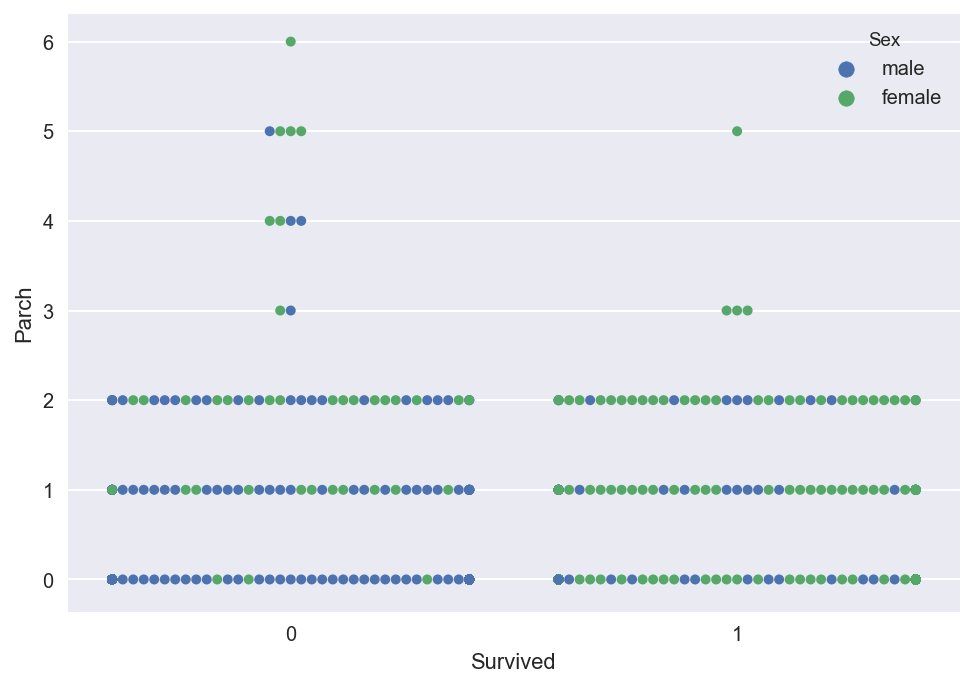

In [23]:
ax = sns.swarmplot(x="Survived", y="Parch", hue="Sex", data=df)
plt.show()

#### Fare

In [24]:
print("Looking for outliers: {}".format(df["Fare"].isnull().sum().sum()))

Looking for outliers: 0


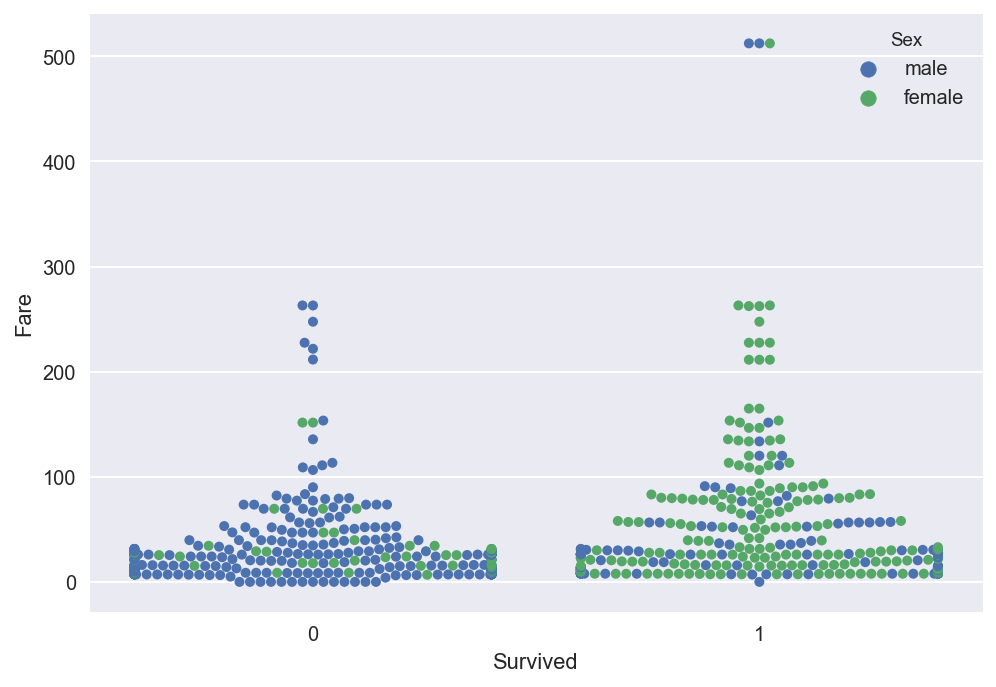

In [25]:
ax = sns.swarmplot(x="Survived", y="Fare", hue="Sex", data=df)
plt.show()

#### Ticket

In [26]:
print("Looking for outliers: {}".format(df["Ticket"].isnull().sum().sum()))
print("Unique values: {}".format(df["Ticket"].unique()))

Looking for outliers: 0
Unique values: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151' '347082'
 '350406' '248706' '382652' '244373' '345763' '2649' '239865' '248698'
 '330923' '113788' '347077' '2631' '19950' '330959' '349216' 'PC 17601'
 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677' 'A./5. 2152'
 '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123' '330958'
 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295' 'A/4. 39886'
 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697' 'C.A. 34651'
 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661' 'C.A. 29395'
 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879' '2680' '1601'
 '348123' '349208' '374746' '248738' '364516' '345767' '345779' '330932'
 '113059' 'SO/C 14885' '3101278' 'W./C. 6608' 'SOTON/OQ 392086' '343275'
 '343276' '347466' 'W.E.P. 5734' 'C.A. 2315' '364500' '374910' 'PC 17754'
 'PC 17759' '231919

#### Cabin

In [27]:
print("Looking for outliers: {}".format(df["Cabin"].isnull().sum().sum()))
print("Unique values: {}".format(df["Cabin"].unique()))

Looking for outliers: 687
Unique values: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


#### Embarked

In [28]:
print("Looking for outliers: {}".format(df["Embarked"].isnull().sum().sum()))
print("Unique values: {}".format(df["Embarked"].unique()))

Looking for outliers: 2
Unique values: ['S' 'C' 'Q' nan]


In [38]:
# Let's fill them with "Q"
df["Embarked"] = df["Embarked"].fillna("Q")
print("Looking for outliers: {}".format(df["Embarked"].isnull().sum().sum()))

Looking for outliers: 0


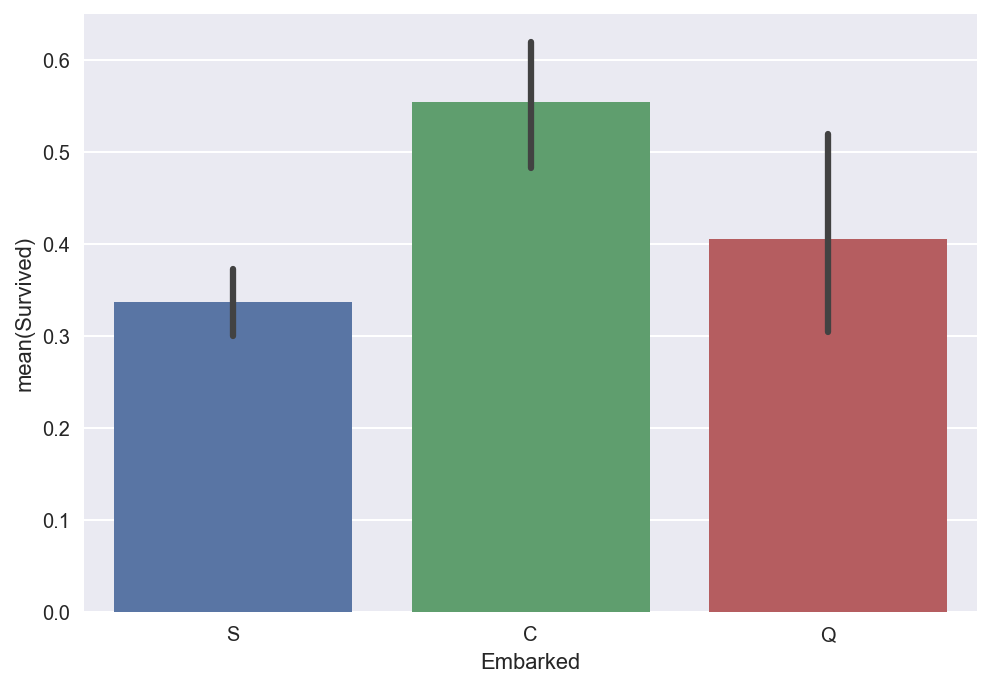

In [40]:
ax = sns.barplot(x = "Embarked", y = "Survived", data = df)
plt.show()

### Preparing and saving data

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df_copy = df

In [32]:
df_copy = df_copy.drop(["PassengerId", "Name", "Cabin", "Ticket", "SibSp", "Parch"], axis = 1)

In [33]:
df_copy.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


### 3. Exploratory data analysis

In [34]:
#df_copy["Embarked"] = pd.get_dummies(df_copy["Embarked"])
df_copy["Embarked"] = df_copy.Embarked.astype("category").cat.codes
#df_copy["Sex"] = pd.get_dummies(df_copy["Sex"])
df_copy["Sex"] = df_copy.Sex.astype("category").cat.codes 

In [35]:
df_copy.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


Normalize the data

In [147]:
df_copy["Age"] = (df_copy["Age"] - df_copy["Age"].min()) / (df_copy["Age"].max() - df_copy["Age"].min())

In [148]:
df_copy["Fare"] = (df_copy["Fare"] - df_copy["Fare"].min()) / (df_copy["Fare"].max() - df_copy["Fare"].min())

In [200]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### 4. Conclusions
Apply a Machine Learning classification model 

In [221]:
# Give format
x = np.array(df_copy.drop(["Survived"], axis = 1))
y = np.array(df_copy["Survived"])

In [222]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [223]:
print(clf.score(x, y))

0.979797979798


### Submission

In [224]:
# Read test set
df_test_set = pd.read_csv("data/test.csv")
df_test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [225]:
# The table has all the variables, we don't need all of them because we 
# only used a few for our model
# Let's clean the variables we don't use
df_test_set = df_test_set.drop(["Name", "Cabin", "Ticket", "SibSp", "Parch"], axis = 1)

In [226]:
# Clean the data
# For the age's values
mean_value_age = df_test_set["Age"].mean()
df_test_set["Age"] = df_test_set["Age"].fillna(mean_value_age)

# For the fare's values
mean_value_fare = df_test_set["Fare"].mean()
df_test_set["Fare"] = df_test_set["Fare"].fillna(mean_value_fare)

In [227]:
# Let's give format to our data
#df_test_set = pd.get_dummies(df_test_set)
df_test_set["Embarked"] = df_test_set.Embarked.astype("category").cat.codes
df_test_set["Sex"] = df_test_set.Sex.astype("category").cat.codes 
df_test_set.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,1
1,893,3,0,47.0,7.0000,2
2,894,2,1,62.0,9.6875,1
3,895,3,1,27.0,8.6625,2
4,896,3,0,22.0,12.2875,2


In [172]:
df_test_set["Age"] = (df_test_set["Age"] - df_test_set["Age"].min()) / (df_test_set["Age"].max() - df_test_set["Age"].min())
df_test_set["Fare"] = (df_test_set["Fare"] - df_test_set["Fare"].min()) / (df_test_set["Fare"].max() - df_test_set["Fare"].min())

In [228]:
df_test_set.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,1
1,893,3,0,47.0,7.0000,2
2,894,2,1,62.0,9.6875,1
3,895,3,1,27.0,8.6625,2
4,896,3,0,22.0,12.2875,2


In [230]:
# Open a file
submission_file = open("data/send_kaggle_file_v3.csv", "w")
submission_file.write("PassengerId,Survived\n")

# Now we can predict our test set
for i in range(df_test_set.shape[0]):
    # Let's locate one example
    example_test_set = df_test_set.drop(["PassengerId"], axis = 1).iloc[i]
    example_test_set_for_sklearn = np.array(example_test_set).reshape(1, -1)
    # Let's use the Machine Learning model
    classification_example_test_set = clf.predict(example_test_set_for_sklearn)
    #print("**For the data \n{}, \n*we predict {}\n".format(example_test_set, classification_example_test_set))
    # Write the output file
    submission_file.write(str(df_test_set["PassengerId"].iloc[i]) \
                          + "," + str(np.squeeze(classification_example_test_set)) + "\n")
# Close the output file   
submission_file.close()